In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

## Learning Pytorch!

In [2]:
# Creating a tensor from data
x_data = torch.tensor([[1.0, 2.0], [3.0, 4.0]])

# Creating a tensor from numpy array
np_array = np.array([[5.0, 6.0], [7.0, 8.0]])
x_np = torch.from_numpy(np_array)

# Creating tensors with specific dimensions
x_zeros = torch.zeros(2, 3)
x_ones = torch.ones(2, 3)
x_random = torch.rand(2, 3)

#### Practice maniupations with PyTorch
Using the following matrix, add 2, multiply by 2, and then multiply y against itself. This should feel like Numpy.

In [6]:
# Basic operations
y = torch.tensor([[9.0, 10.0], 
                  [11.0, 12.0]])


In [12]:
print(f'First, add 2 to y: \n{y + 2}. \nNow, multiply y by 2: \n{y * 2}. \nFinally, square y: \n{y ** 2}.')


First, add 2 to y: 
tensor([[11., 12.],
        [13., 14.]]). 
Now, multiply y by 2: 
tensor([[18., 20.],
        [22., 24.]]). 
Finally, square y: 
tensor([[ 81., 100.],
        [121., 144.]]).


## A one layer perceptron

Text(0, 0.5, 'y')

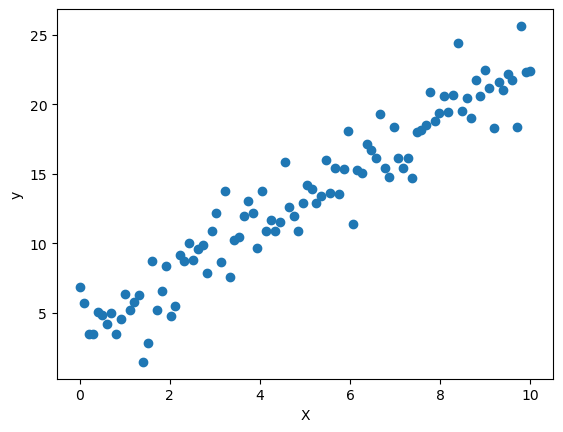

In [13]:
# Generate synthetic data for linear regression
X = torch.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X + 3 + torch.randn(100, 1) * 2  # Linear relation with some noise

# Visualize the data
plt.scatter(X.numpy(), y.numpy())
plt.xlabel("X")
plt.ylabel("y")

In [14]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # 1 input feature, 1 output feature

    def forward(self, x):
        return self.linear(x)

In [15]:
# Instantiate the model
model = LinearRegressionModel()

# Define the loss function (Mean Squared Error)
criterion = nn.MSELoss()

# Define the optimizer (Stochastic Gradient Descent with a learning rate of 0.01)
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [16]:

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass: compute predictions and loss
    predictions = model(X)
    loss = criterion(predictions, y)
    
    # Backward pass: compute gradients and update parameters
    optimizer.zero_grad()  # Reset gradients to zero
    loss.backward()        # Backpropagate the error
    optimizer.step()       # Update parameters
    
    # Print progress
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [10/100], Loss: 6.7410
Epoch [20/100], Loss: 6.3815
Epoch [30/100], Loss: 6.0561
Epoch [40/100], Loss: 5.7615
Epoch [50/100], Loss: 5.4948
Epoch [60/100], Loss: 5.2533
Epoch [70/100], Loss: 5.0348
Epoch [80/100], Loss: 4.8369
Epoch [90/100], Loss: 4.6578
Epoch [100/100], Loss: 4.4957


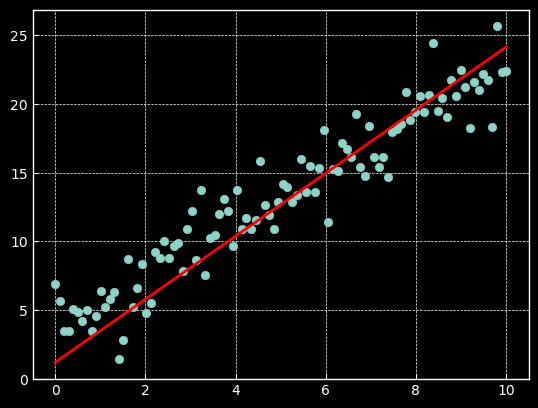

In [32]:
# Plot the model's predictions
predicted = model(X).detach().numpy()  # Detach to convert to numpy
plt.plot(X.numpy(), predicted, color="red", label="Fitted Line")
plt.scatter(X.numpy(), y.numpy())
plt.style.use('dark_background')

In [33]:
model.linear.weight.data, model.linear.bias.data

(tensor([[2.2935]]), tensor([1.2031]))

### Using the template code above, generate 3-dimensional synthetic linear regression data
You are encouraged to translate your homework solution from numpy into torch.

Build your own neural net!

In [143]:
## Generate 3-dim. syn. data 
X = torch.randn(100, 3)

## Generate random values for the weights and intercept
weights = torch.randn(3+1, 1)

## Convert to numpy next step 
X_np = X.numpy()

## Add ones to account for intercept 
new_x = np.hstack((np.ones((100, 1)), X_np)) 

## Generate y's
y = np.dot(new_x, weights) + np.random.randn(100,1)

## Convert to tensors w float format to fix error i was getting 
X = torch.from_numpy(X_np).float() 
Y = torch.from_numpy(y).float() 


## Updated class defs
class MultiLinearRegressionModel(nn.Module):
    def __init__(self):
        super(MultiLinearRegressionModel, self).__init__()
        self.linear = nn.Linear(3, 1)  # 1 input feature, 1 output feature

    def forward(self, x):
        return self.linear(x)


## Instantiate the model
model = MultiLinearRegressionModel()

## Define the loss function (Mean Squared Error)
criterion = nn.MSELoss() 

## Define the optimizer (Stochastic Gradient Descent with a learning rate of 0.01)
optimizer = optim.SGD(model.parameters(), lr=0.01)

## Training loop
num_epochs = 100
for epoch in range(num_epochs):
    ## Forward pass: compute predictions and loss
    predictions = model(X)
    loss = criterion(predictions, Y)
    
    ## Backward pass: compute gradients and update parameters
    optimizer.zero_grad()  ## Reset gradients to zero
    loss.backward()        ## Backpropagate the error
    optimizer.step()       ## Update parameters
    
    ## Print progress
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [10/100], Loss: 11.4908
Epoch [20/100], Loss: 7.7719
Epoch [30/100], Loss: 5.3841
Epoch [40/100], Loss: 3.8488
Epoch [50/100], Loss: 2.8599
Epoch [60/100], Loss: 2.2218
Epoch [70/100], Loss: 1.8094
Epoch [80/100], Loss: 1.5421
Epoch [90/100], Loss: 1.3686
Epoch [100/100], Loss: 1.2557


## Building a neural net for XOR

Build a neural net for solving the XOR problem. The first line layer is written for you.
Use the training code from above to make one run, and assess whether your output is good or not.
Once you get it to run, try varying the number of layers and the number of hidden dimensions. What do you observe?

In [152]:
# XOR inputs and labels
X = torch.tensor([[0, 0], 
                  [0, 1], 
                  [1, 0], 
                  [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], 
                  [1], 
                  [1], 
                  [0]], dtype=torch.float32)

In [150]:
class XORNet(nn.Module):
    def __init__(self):
        super(XORNet, self).__init__()
        self.fc1 = nn.Linear(2, 1)   # Input layer to hidden layer
        # more layers

    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(x)  # ReLU activation for hidden layer
        # more feed-forward
        return x

# Instantiate the model
model = XORNet()

In [160]:
predictions = model(X)
loss = criterion(predictions, y)
loss

tensor(0.3893, grad_fn=<MseLossBackward0>)

In [161]:
class XORNet(nn.Module):
    def __init__(self):
        super(XORNet, self).__init__()
        self.fc1 = nn.Linear(2, 100)   # Input layer to hidden layer
        # more layers
        self.fc2 = nn.Linear(100, 10)
        self.fc3 = nn.Linear(10, 10)
        self.fc4 = nn.Linear(10, 1)
    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(x)  # ReLU activation for hidden layer
        # more feed-forward
        x = self.fc2(x)
        x = torch.relu(x)
        x = self.fc3(x)
        x = torch.relu(x)
        x = self.fc4(x)
        x = torch.relu(x)
        return x
# Instantiate the model
model = XORNet()
# Define the loss function (Mean Squared Error)
criterion = nn.MSELoss()
# Define the optimizer (Stochastic Gradient Descent with a learning rate of 0.01)
optimizer = optim.SGD(model.parameters(), lr=0.01)

torch.Size([1, 3, 1, 4])
torch.Size([3, 4])


## After training, try to see if your predictions are good.

In [120]:
# Here, testing for the combination [1, 0]
test_input = torch.tensor([[1, 0]], dtype=torch.float32)

# Make the prediction
with torch.no_grad():  # No need for gradients during inference
    prediction = model(test_input)
    # Apply threshold to get binary prediction
    predicted_class = (prediction > 0.5).float()
    
predicted_class

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x2 and 3x1)